In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
le = LabelEncoder()

In [6]:
df['Encode'] = le.fit_transform(df['Extracurricular Activities'])

In [7]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Encode
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0
...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,1
9996,7,64,Yes,8,5,58.0,1
9997,6,83,Yes,8,5,74.0,1
9998,9,97,Yes,7,0,95.0,1


In [8]:
data = df.drop(columns = 'Extracurricular Activities')

In [9]:
data

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Encode
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,1
9996,7,64,8,5,58.0,1
9997,6,83,8,5,74.0,1
9998,9,97,7,0,95.0,1


In [10]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index', 'Encode'],
      dtype='object')

In [11]:
x = data[['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced','Encode']]
y = data['Performance Index']

In [12]:
x

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Encode
0,7,99,9,1,1
1,4,82,4,2,0
2,8,51,7,2,1
3,5,52,5,2,1
4,7,75,8,5,0
...,...,...,...,...,...
9995,1,49,4,2,1
9996,7,64,8,5,1
9997,6,83,8,5,1
9998,9,97,7,0,1


In [13]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=32)

In [15]:
ss = StandardScaler()
model = LinearRegression()

In [16]:
x_train_scaled = ss.fit_transform(x_train)
x_train_scaled

array([[-0.00236363,  0.83723056, -1.4895177 ,  0.84230503,  1.0032553 ],
       [ 0.38353582,  1.12493371,  0.27863072, -1.6014356 ,  1.0032553 ],
       [ 0.38353582, -1.46439466,  0.27863072,  0.84230503,  1.0032553 ],
       ...,
       [ 0.38353582,  1.12493371,  1.45739634,  1.19141083, -0.99675526],
       [-0.00236363, -1.29177277,  0.27863072,  1.54051664,  1.0032553 ],
       [-0.00236363, -0.7739071 , -1.4895177 ,  1.54051664,  1.0032553 ]])

In [17]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [18]:
x_test_scaled = ss.transform(x_test)
x_test_scaled

array([[-1.16006199, -1.69455719,  0.86801353, -0.90322399, -0.99675526],
       [ 0.38353582, -1.63701656,  0.86801353, -0.20501238,  1.0032553 ],
       [ 0.38353582,  1.64279939,  1.45739634, -1.2523298 ,  1.0032553 ],
       ...,
       [-1.16006199,  1.58525876,  0.27863072, -1.6014356 , -0.99675526],
       [ 1.15533472,  1.29755561,  1.45739634,  1.19141083, -0.99675526],
       [ 1.15533472, -1.06161025,  0.86801353, -0.20501238, -0.99675526]])

In [19]:
y_pred = model.predict(x_test_scaled)
y_pred

array([16.59502805, 29.98597042, 87.95278753, ..., 73.79903648,
       88.34286955, 45.31749828])

In [20]:
y_test

5097    18.0
2580    29.0
260     89.0
6781    56.0
5468    61.0
        ... 
6340    59.0
9648    93.0
6177    76.0
3570    88.0
1191    47.0
Name: Performance Index, Length: 2000, dtype: float64

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

In [22]:
mae = mean_absolute_error
mse = mean_squared_error
r2 = r2_score
rmse = root_mean_squared_error

In [23]:
mae(y_test,y_pred)

1.6390855634943686

In [24]:
mse(y_test,y_pred)

4.2064102644241

In [25]:
r2(y_test,y_pred)

0.9885198444421318

In [26]:
residual = y_test-y_pred

In [27]:
residual

5097    1.404972
2580   -0.985970
260     1.047212
6781   -1.858682
5468    0.289093
          ...   
6340   -0.066061
9648   -2.590391
6177    2.200964
3570   -0.342870
1191    1.682502
Name: Performance Index, Length: 2000, dtype: float64

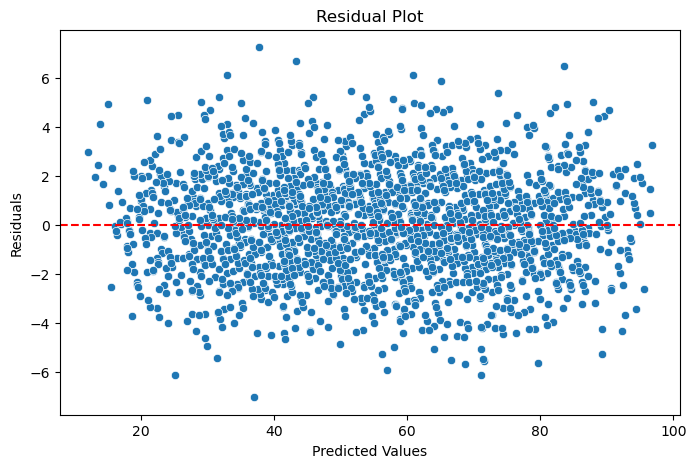

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residual)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [29]:
joblib.dump(le,'LabelEncoded.pkl')

['LabelEncoded.pkl']

In [30]:
joblib.dump(model,'Student_Performance.pkl')

['Student_Performance.pkl']

In [ ]:
joblib.dump(ss,'Standard_Scaler.pkl')

['Standard_Scaler.kpl']

In [32]:
data = pd.crosstab(df['Performance Index'],df['Extracurricular Activities'])
data

Extracurricular Activities,No,Yes
Performance Index,,
10.0,1,0
11.0,3,2
12.0,7,1
13.0,8,5
14.0,6,1
...,...,...
96.0,8,6
97.0,7,6
98.0,1,6


In [33]:
from scipy.stats import chi2_contingency

In [34]:
chi2_contingency(data)[1]<0.05

True